In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("C:/Users/singh/Downloads/archive/vmCloud_data.csv")

In [3]:
df

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:34,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:47,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed
3,e672e32f-c134-4fbc-992b-34eb63bef6bf,2023-02-09 11:45:49,54.488318,88.100960,NaN,195.639954,5876.0,16.456670,0.529511,compute,high,completed
4,f38b8b50-6926-4533-be4f-89ad11624071,2023-06-14 08:27:26,42.365480,NaN,NaN,359.451537,3361.0,55.307992,0.351907,NaN,medium,waiting
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,8fb401eb-a992-4c70-82fc-2c2275970f34,2023-02-13 16:02:13,74.519189,99.989800,175.109927,331.522722,3314.0,71.940825,0.502973,io,medium,completed
1999996,d6359442-7595-4bbb-ac95-9a13d83d3029,2023-07-03 11:44:45,93.964350,NaN,238.055898,211.738748,4077.0,55.240832,0.518950,io,low,waiting
1999997,f3b71ef0-be37-4b2f-b3d8-ad9101d7f0f2,2023-03-28 19:12:09,92.835858,92.882502,456.640791,488.930384,7861.0,89.559091,0.597325,io,high,running
1999998,c2b29a0c-5c6f-46ac-b104-9b1bc7d3c3d2,2023-02-27 21:13:16,89.169392,36.359751,977.003949,148.467449,762.0,0.544371,0.303627,io,high,running


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   vm_id                      object 
 1   timestamp                  object 
 2   cpu_usage                  float64
 3   memory_usage               float64
 4   network_traffic            float64
 5   power_consumption          float64
 6   num_executed_instructions  float64
 7   execution_time             float64
 8   energy_efficiency          float64
 9   task_type                  object 
 10  task_priority              object 
 11  task_status                object 
dtypes: float64(7), object(5)
memory usage: 183.1+ MB


In [5]:
description = df.describe()
description

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency
count,1.800962e+06,1.799490e+06,1.800519e+06,1.799729e+06,1.800314e+06,1.800173e+06,1.799958e+06
mean,5.001223e+01,4.998190e+01,5.000076e+02,2.500584e+02,5.001897e+03,4.997133e+01,5.002524e-01
std,2.887661e+01,2.885326e+01,2.885793e+02,1.443634e+02,2.885247e+03,2.886130e+01,2.886669e-01
min,7.071203e-05,2.516784e-06,1.890490e-04,1.923802e-04,0.000000e+00,1.036192e-06,1.258445e-07
25%,2.497675e+01,2.500378e+01,2.500669e+02,1.249695e+02,2.504000e+03,2.497908e+01,2.501631e-01
50%,5.005476e+01,4.997609e+01,5.000076e+02,2.502472e+02,5.002000e+03,4.996407e+01,5.003692e-01
75%,7.502934e+01,7.495588e+01,7.498175e+02,3.751069e+02,7.502000e+03,7.497650e+01,7.503617e-01
max,9.999997e+01,9.999993e+01,9.999998e+02,4.999993e+02,9.999000e+03,9.999999e+01,1.000000e+00


In [6]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 vm_id                        200638
timestamp                    200666
cpu_usage                    199038
memory_usage                 200510
network_traffic              199481
power_consumption            200271
num_executed_instructions    199686
execution_time               199827
energy_efficiency            200042
task_type                    199962
task_priority                199433
task_status                  200306
dtype: int64


In [7]:
# 1. **Create Sustainability Index (SI)**
df['Sustainability_Index'] = ((df['cpu_usage'] + df['memory_usage']) / df['power_consumption']) * (df['execution_time'] / df['num_executed_instructions'])
df['Sustainability_Index'] = df['Sustainability_Index'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 2. **Create Energy Efficiency Ratio (EER)**
df['Energy_Efficiency_Ratio'] = df['num_executed_instructions'] / df['power_consumption']
df['Energy_Efficiency_Ratio'] = df['Energy_Efficiency_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [8]:
print(df[['Sustainability_Index', 'Energy_Efficiency_Ratio']].head())

   Sustainability_Index  Energy_Efficiency_Ratio
0              0.004284                26.152762
1              0.002167                14.762325
2              0.000000                23.687950
3              0.002041                30.034765
4              0.000000                 9.350356


In [9]:
correlation_matrix = df[['cpu_usage', 'memory_usage', 'power_consumption', 'Sustainability_Index', 'Energy_Efficiency_Ratio']].corr()

print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                          cpu_usage  memory_usage  power_consumption  \
cpu_usage                 1.000000     -0.001102          -0.001706   
memory_usage             -0.001102      1.000000           0.000283   
power_consumption        -0.001706      0.000283           1.000000   
Sustainability_Index      0.001363      0.001328          -0.001940   
Energy_Efficiency_Ratio  -0.000580      0.000362          -0.008001   

                         Sustainability_Index  Energy_Efficiency_Ratio  
cpu_usage                            0.001363                -0.000580  
memory_usage                         0.001328                 0.000362  
power_consumption                   -0.001940                -0.008001  
Sustainability_Index                 1.000000                 0.058079  
Energy_Efficiency_Ratio              0.058079                 1.000000  


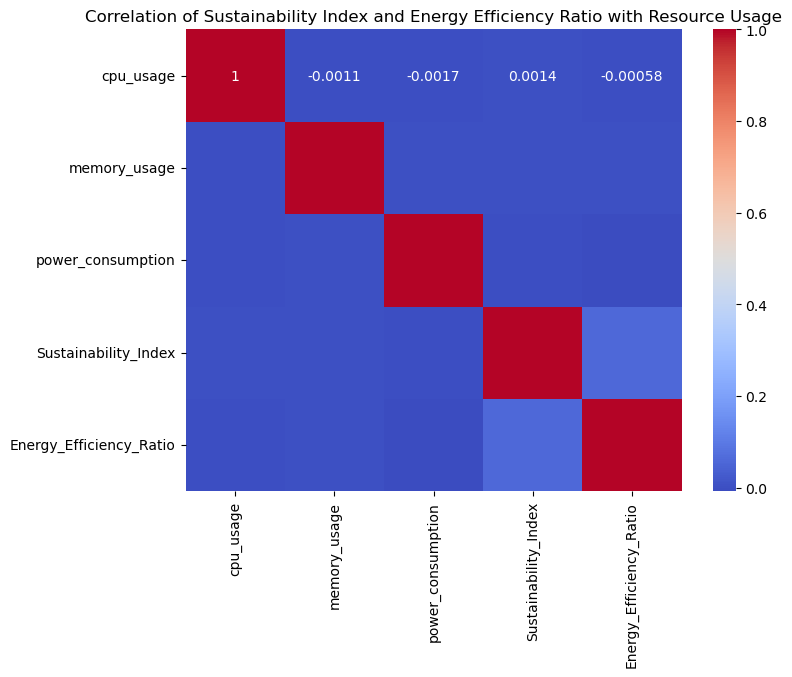

In [10]:
# Visualize the correlation
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Sustainability Index and Energy Efficiency Ratio with Resource Usage')
plt.show()

In [11]:
# Fill missing numerical values with the median, which is less sensitive to outliers
numerical_cols = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 
                  'num_executed_instructions', 'execution_time', 'energy_efficiency']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = ['vm_id', 'task_type', 'task_priority', 'task_status']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [12]:
# Convert 'timestamp' to datetime format if not already converted
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 3. **Outlier Detection and Removal**
# Removing outliers in numerical columns using Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(df[numerical_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Retain rows where all z-scores are less than 3

# 4. **Feature Engineering**
# Create new features such as 'resource_efficiency' = (CPU + Memory) / Power consumption
df['resource_efficiency'] = (df['cpu_usage'] + df['memory_usage']) / df['power_consumption']

# 5. **Encoding Categorical Variables**
# Convert categorical columns to numeric using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['task_type', 'task_priority', 'task_status'])

In [13]:
df_encoded

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Sustainability_Index,...,resource_efficiency,task_type_compute,task_type_io,task_type_network,task_priority_high,task_priority_low,task_priority_medium,task_status_completed,task_status_running,task_status_waiting
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,0.004284,...,0.465004,False,False,True,False,False,True,False,False,True
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:34,71.518937,29.901883,500.007595,362.273569,5348.0,41.396040,0.349856,0.002167,...,0.279956,False,True,False,True,False,False,True,False,False
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:47,50.054758,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,0.000000,...,0.616776,False,True,False,False,False,True,True,False,False
3,e672e32f-c134-4fbc-992b-34eb63bef6bf,2023-02-09 11:45:49,54.488318,88.100960,500.007595,195.639954,5876.0,16.456670,0.529511,0.002041,...,0.728835,True,False,False,True,False,False,True,False,False
4,f38b8b50-6926-4533-be4f-89ad11624071,2023-06-14 08:27:26,42.365480,49.976089,500.007595,359.451537,3361.0,55.307992,0.351907,0.000000,...,0.256896,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,8fb401eb-a992-4c70-82fc-2c2275970f34,2023-02-13 16:02:13,74.519189,99.989800,175.109927,331.522722,3314.0,71.940825,0.502973,0.011427,...,0.526386,False,True,False,False,False,True,True,False,False
1999996,d6359442-7595-4bbb-ac95-9a13d83d3029,2023-07-03 11:44:45,93.964350,49.976089,238.055898,211.738748,4077.0,55.240832,0.518950,0.000000,...,0.679802,False,True,False,False,True,False,False,False,True
1999997,f3b71ef0-be37-4b2f-b3d8-ad9101d7f0f2,2023-03-28 19:12:09,92.835858,92.882502,456.640791,488.930384,7861.0,89.559091,0.597325,0.004328,...,0.379846,False,True,False,True,False,False,False,True,False
1999998,c2b29a0c-5c6f-46ac-b104-9b1bc7d3c3d2,2023-02-27 21:13:16,89.169392,36.359751,977.003949,148.467449,762.0,0.544371,0.303627,0.000604,...,0.845499,False,True,False,True,False,False,False,True,False


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 21 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   vm_id                      object        
 1   timestamp                  datetime64[ns]
 2   cpu_usage                  float64       
 3   memory_usage               float64       
 4   network_traffic            float64       
 5   power_consumption          float64       
 6   num_executed_instructions  float64       
 7   execution_time             float64       
 8   energy_efficiency          float64       
 9   Sustainability_Index       float64       
 10  Energy_Efficiency_Ratio    float64       
 11  resource_efficiency        float64       
 12  task_type_compute          bool          
 13  task_type_io               bool          
 14  task_type_network          bool          
 15  task_priority_high         bool          
 16  task_priority_low          bool     

In [15]:

# Set the 'timestamp' column as the index for resampling
#df.set_index('timestamp', inplace=True)  # No need to assign to df again

# Resample the data to get daily averages for numeric columns only
df_daily = df.select_dtypes(include=[np.number]).resample('D').mean()

# Time series plot for Sustainability Index
df_daily['Sustainability_Index'].plot(figsize=(10, 6))
plt.title("Time Series of Sustainability Index")
plt.xlabel("Date")
plt.ylabel("Sustainability Index")
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
# ARIMA model for predicting future Sustainability Index
model = ARIMA(df_daily['Sustainability_Index'], order=(5, 1, 0))
arima_result = model.fit()

In [ ]:
# Forecast for the next 30 days
forecast = arima_result.forecast(steps=30)

In [ ]:
# Plot the forecasted values
plt.plot(df_daily.index, df_daily['Sustainability_Index'], label='Historical')
plt.plot(pd.date_range(df_daily.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('Sustainability Index Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sustainability Index')
plt.legend()
plt.show()

In [ ]:
# 5. **Prediction Analysis** (Linear Regression)
# Predict power consumption based on CPU usage, memory usage, and the new features (SI, EER)
X = df[['cpu_usage', 'memory_usage', 'Sustainability_Index', 'Energy_Efficiency_Ratio']]
y = df['power_consumption']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot the predicted vs actual power consumption
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Power Consumption')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.show()

In [ ]:
# Fill missing numerical values with the median, which is less sensitive to outliers
numerical_cols = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 
                  'num_executed_instructions', 'execution_time', 'energy_efficiency']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = ['vm_id', 'task_type', 'task_priority', 'task_status']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [ ]:
# 3. **Outlier Detection and Removal**
# Removing outliers in numerical columns using Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(df[numerical_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Retain rows where all z-scores are less than 3

# 4. **Feature Engineering**
# Create new features such as 'resource_efficiency' = (CPU + Memory) / Power consumption
df['resource_efficiency'] = (df['cpu_usage'] + df['memory_usage']) / df['power_consumption']

# 5. **Encoding Categorical Variables**
# Convert categorical columns to numeric using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['task_type', 'task_priority', 'task_status'])

# Display the cleaned and processed data
print(df_encoded.head())

# Save the cleaned dataset
df_encoded.to_csv('vmCloud_cleaned_data.csv', index=False)

print("Data cleaning and processing completed.")

In [ ]:
df_encoded

In [ ]:
df.info()

In [ ]:
df_encoded.info()

In [ ]:
df_encoded.dtypes

**Regression Model for Predicting Energy Consumption**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection for predicting power consumption
X = df_encoded[['cpu_usage', 'memory_usage', 'network_traffic', 'execution_time', 'num_executed_instructions']]
y = df_encoded['power_consumption']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
import matplotlib.pyplot as plt
coefficients = model.coef_

plt.barh(X.columns, coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Power Consumption")
plt.show()

**Classification Model for Identifying Inefficiencies in Resource Usage**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a binary classification label for inefficiency
# Let's assume energy efficiency > 0.5 is "efficient", and <= 0.5 is "inefficient"
df_encoded['efficiency_label'] = np.where(df_encoded['energy_efficiency'] > 0.5, 1, 0)

# Features and target for classification
X = df_encoded[['cpu_usage', 'memory_usage', 'network_traffic', 'execution_time', 'num_executed_instructions']]
y = df_encoded['efficiency_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Feature importance
importances = clf.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Energy Inefficiency")
plt.show()


**Clustering for Task Optimization**

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

# Features for clustering
X_cluster = df_encoded[['cpu_usage', 'memory_usage', 'network_traffic', 'execution_time', 'energy_efficiency']]

# Fit KMeans with 3 clusters (you can experiment with this number)
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(X_cluster)

# Plot the clusters
sns.scatterplot(x='cpu_usage', y='memory_usage', hue='cluster', data=df_encoded, palette='Set2')
plt.title("Task Clusters Based on CPU and Memory Usage")
plt.show()
